In [8]:
%matplotlib inline

import os
import matplotlib
import numpy as np
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import skimage.io as ski_io
from IPython.display import HTML

In [9]:
img_court = ski_io.imread('fullcourt.png')

In [10]:
class Episode():
    def __init__(self, data, length, info=None, FPS=25):
        self.data = data
        self.length = length
        self.info = info
        self.FPS = FPS
    
    @property
    def ani(self):
        fig, ax = plt.subplots()
        ax.set_aspect('equal')

        def func(i):
            ax.clear()
            ax.imshow(img_court, extent=[0,94,0,50])
            if self.info is not None:
                ax.text(1, 1, str(self.info[i]), fontsize=12)
            ax.scatter(self.data[i, 1:6, 0], self.data[i, 1:6, 1], c='r', s=100)
            ax.scatter(self.data[i, 6:11, 0], self.data[i, 6:11, 1], c='b', s=100)
            ax.scatter(self.data[i, 0, 0], self.data[i, 0, 1], c='g')
            ax.set_xlim(-10, 104)
            ax.set_ylim(-10, 60)
            return _,

        return animation.FuncAnimation(fig, func, frames=self.length, interval=1000/self.FPS)
    
    def show_ani(self, display_type='js'):
        if display_type == 'js':
            return HTML(self.ani.to_jshtml())
        if display_type == 'html5':
            return HTML(self.ani.to_html5_video())
        else:
            raise ValueError("display_type should be 'js' or 'html5'.")
        
    def output_ani(self, filename):
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=self.FPS, metadata=dict(artist='Me'), bitrate=1800)
        self.ani.save(filename, writer=writer)

In [11]:
class EpisodeWithEpv():
    def __init__(self, data, length, info=None, FPS=5):
        self.data = data
        self.length = length
        self.info = info
        self.FPS = FPS
    
    @property
    def ani(self):
        fig = plt.figure() 
        gs = gridspec.GridSpec(2, 1, height_ratios=[6, 1]) 
        ax1 = plt.subplot(gs[0])
        ax2 = plt.subplot(gs[1])
        
        def func(i):
            ax2.clear()
            ax2.plot(list(range(self.length)), self.info[:self.length])
            ax2.scatter(i, self.info[i])
            ax1.clear()
            ax1.imshow(img_court, extent=[0,94,0,50])
            if self.info is not None:
                ax1.text(1, 1, str(self.info[i]), fontsize=12)
            ax1.scatter(self.data[i, 1:6, 0], self.data[i, 1:6, 1], c='r', s=100)
            ax1.scatter(self.data[i, 6:11, 0], self.data[i, 6:11, 1], c='b', s=100)
            ax1.scatter(self.data[i, 0, 0], self.data[i, 0, 1], c='g')
            ax1.set_xlim(-10, 104)
            ax1.set_ylim(-10, 60)
            return _,

        return animation.FuncAnimation(fig, func, frames=self.length, interval=1000/self.FPS)
    
    def show_ani(self, display_type='js'):
        if display_type == 'js':
            return HTML(self.ani.to_jshtml())
        if display_type == 'html5':
            return HTML(self.ani.to_html5_video())
        else:
            raise ValueError("display_type should be 'js' or 'html5'.")
        
    def output_ani(self, filename):
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=self.FPS, metadata=dict(artist='Me'), bitrate=1800)
        self.ani.save(filename, writer=writer)

In [19]:
import h5py
with h5py.File('eval_result_order.hdf5', 'r') as f:
    pos_ = np.array(f['pos'])
    len_ = np.array(f['len'])
    epv_ = np.array(f['epv'])
    epv_ = epv_[:, :, 0]
    pos_ = pos_[:, :, -1]
    pos_ = np.reshape(pos_, [pos_.shape[0], pos_.shape[1], 11, 2])

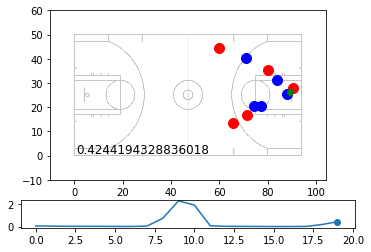

In [20]:
i = 0
e = EpisodeWithEpv(pos_[i], len_[i], info=epv_[i], FPS=5)
e.show_ani()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


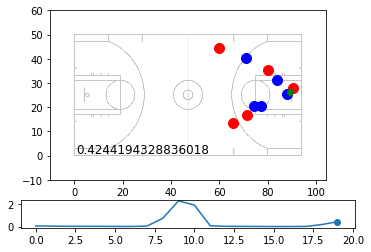

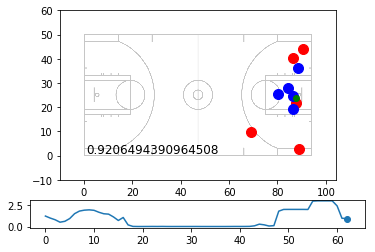

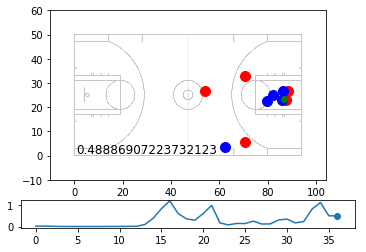

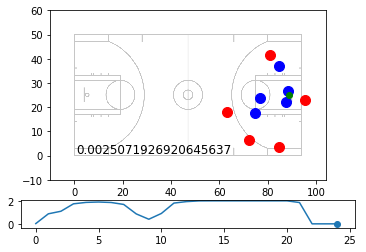

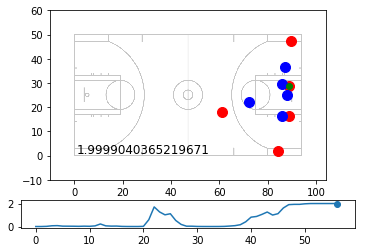

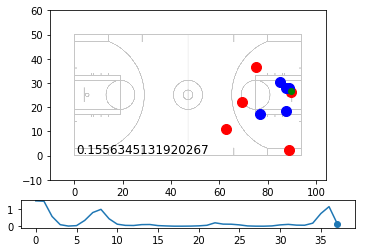

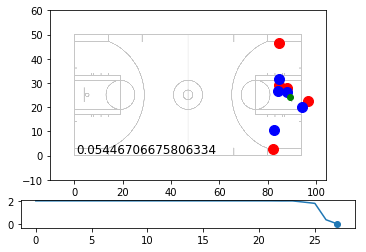

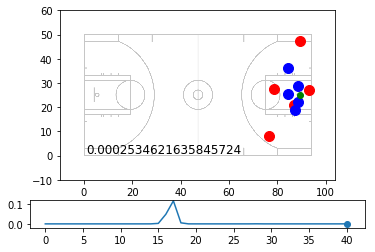

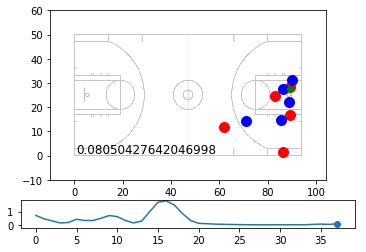

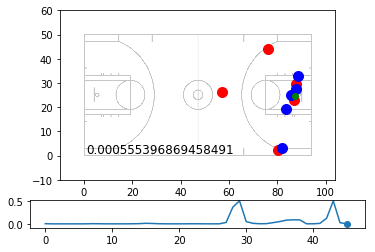

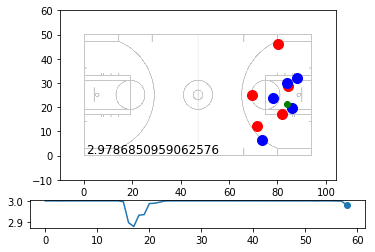

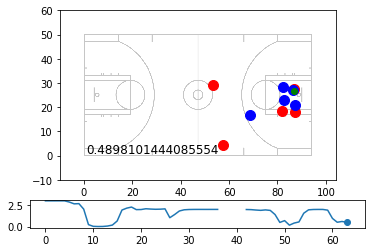

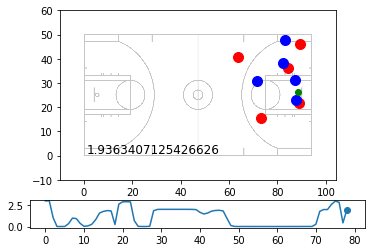

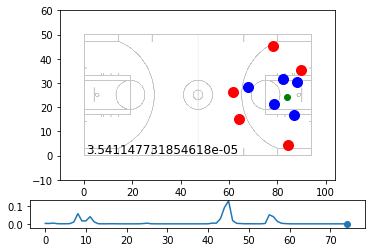

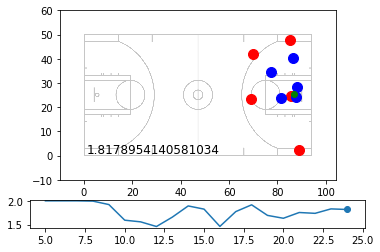

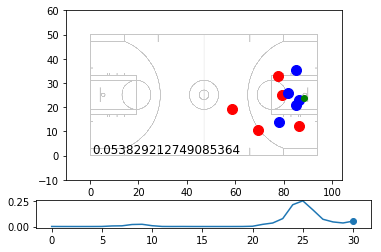

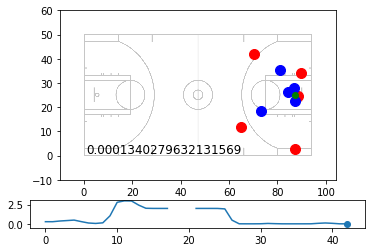

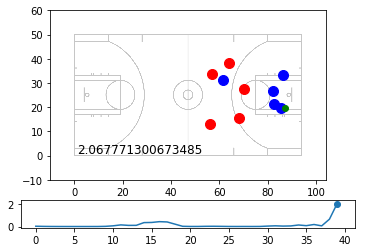

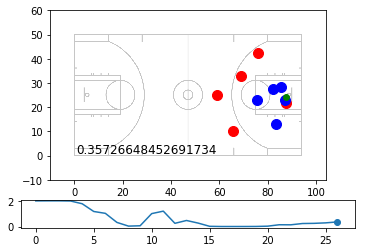

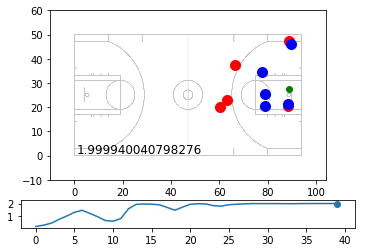

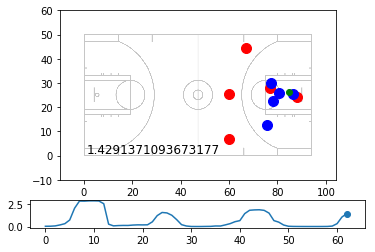

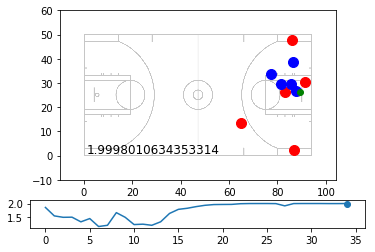

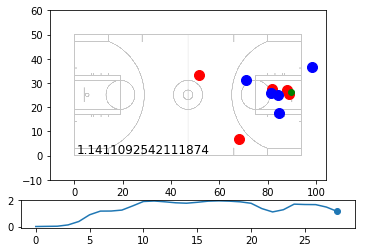

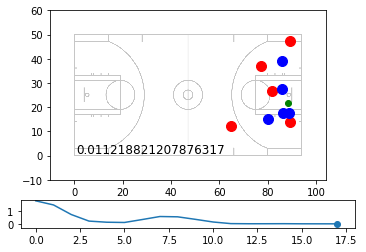

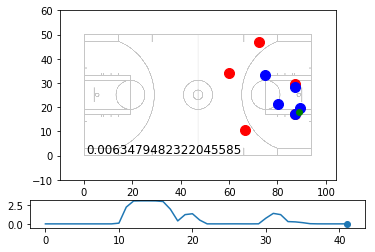

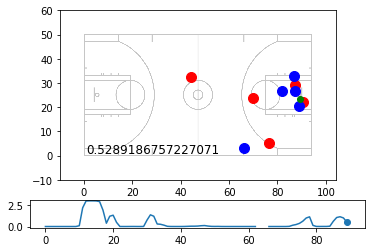

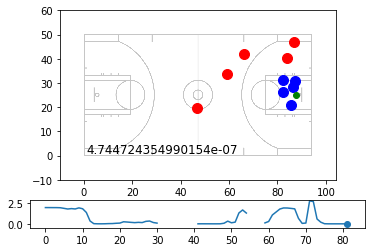

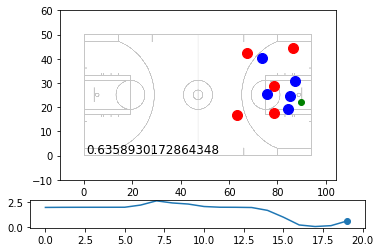

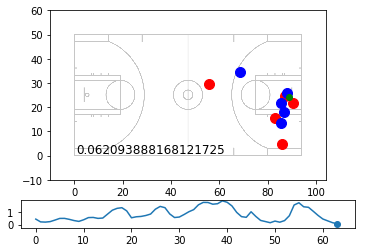

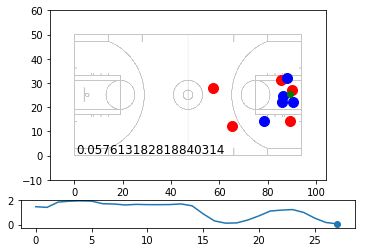

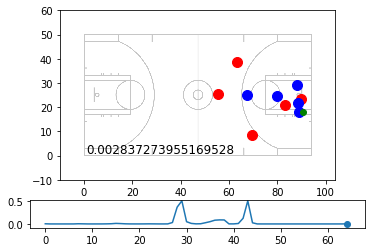

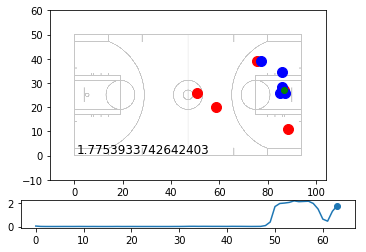

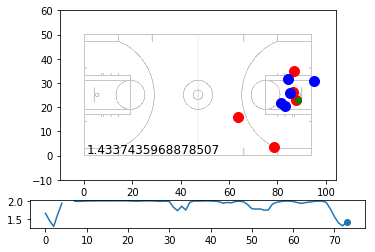

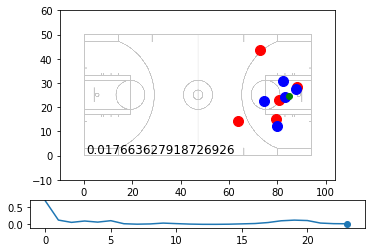

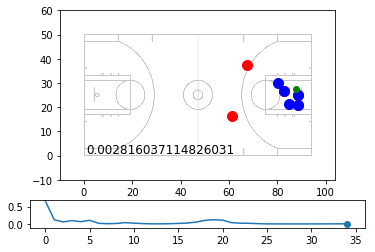

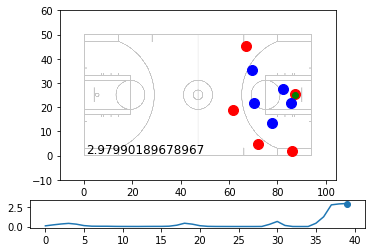

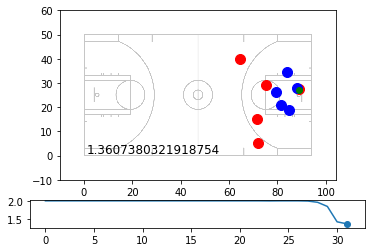

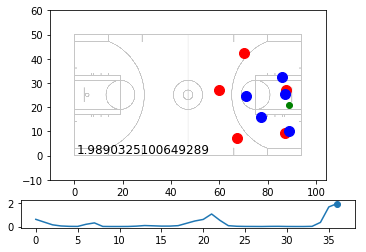

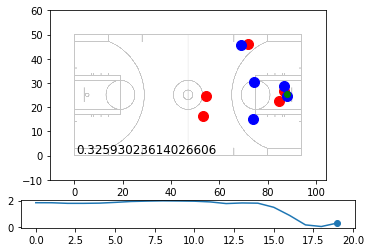

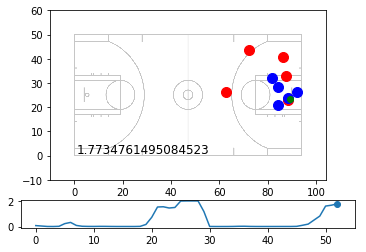

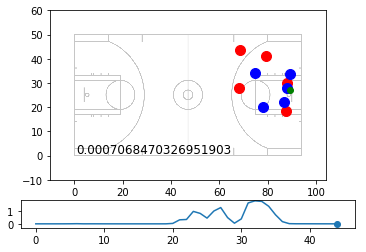

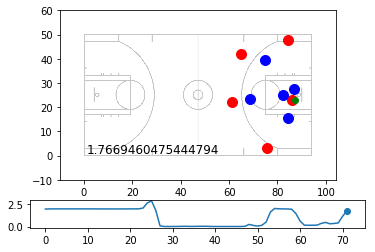

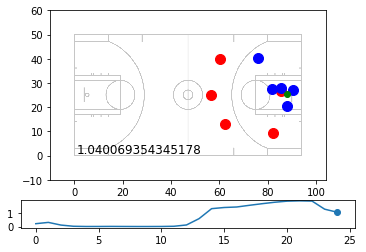

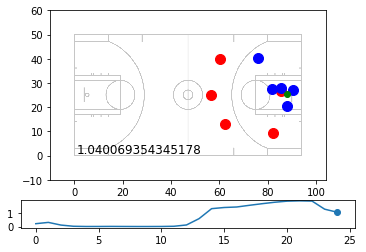

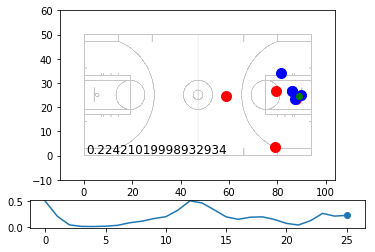

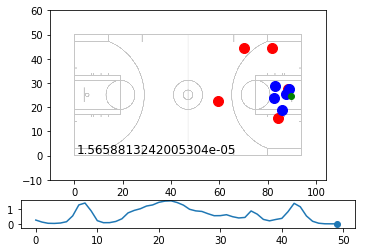

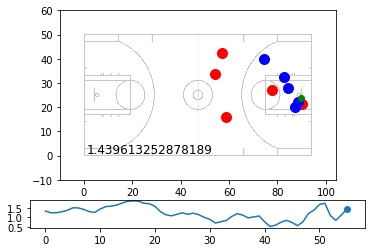

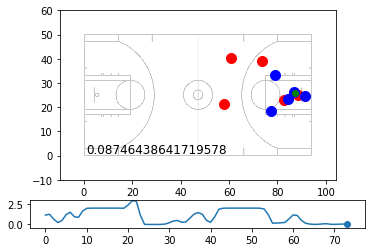

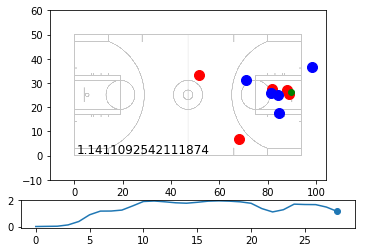

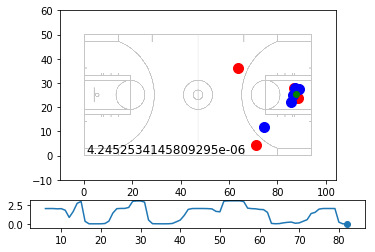

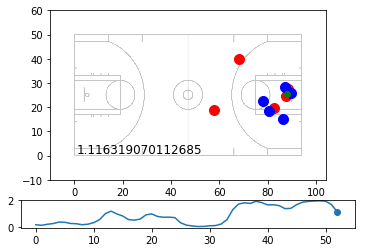

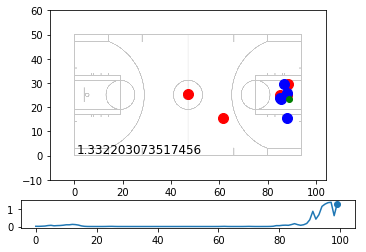

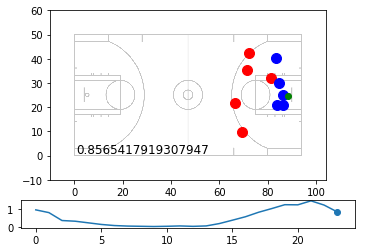

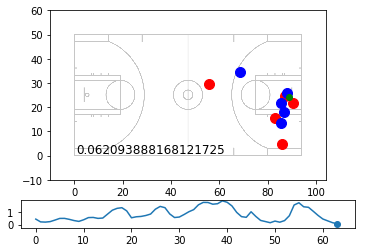

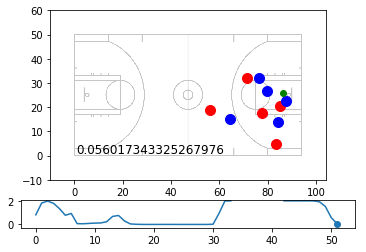

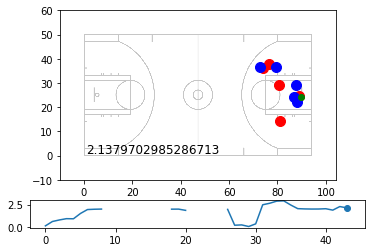

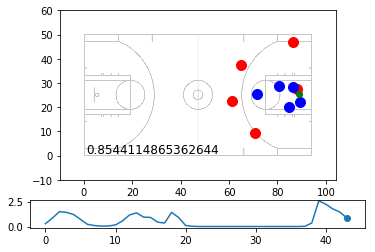

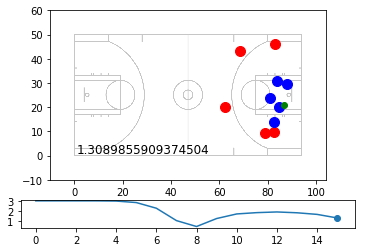

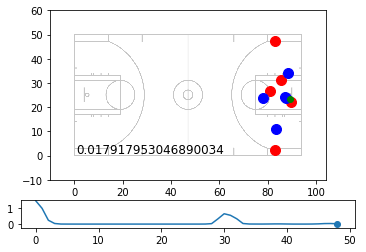

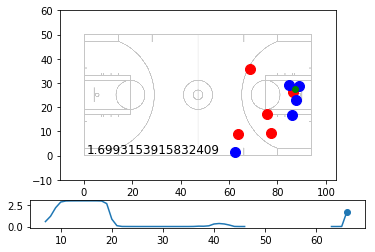

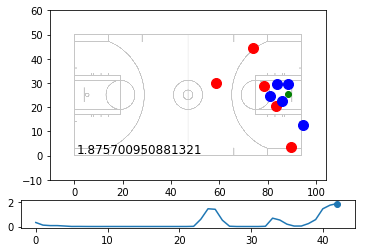

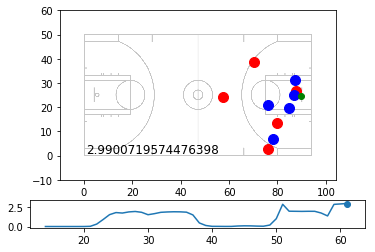

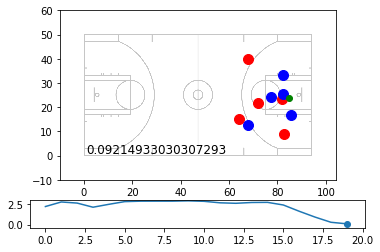

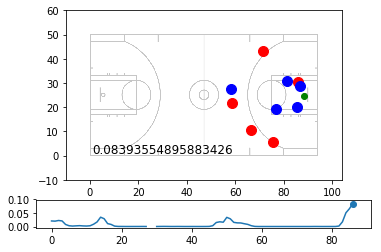

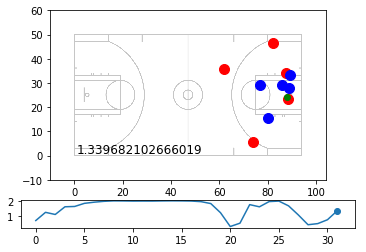

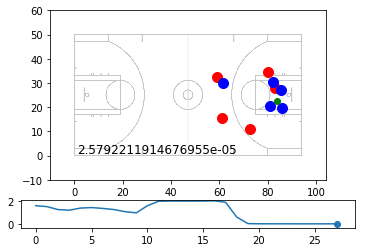

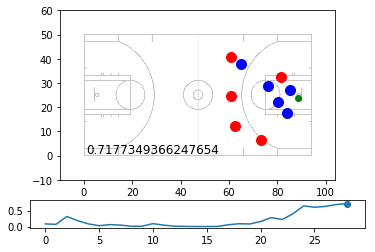

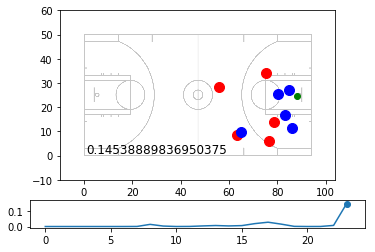

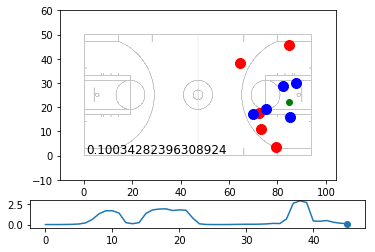

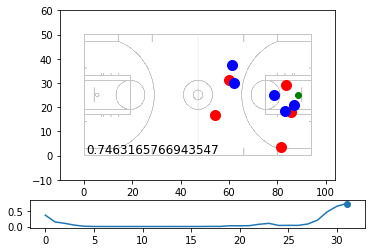

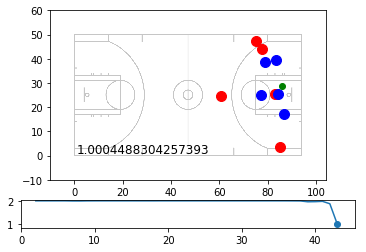

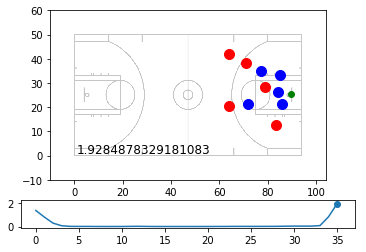

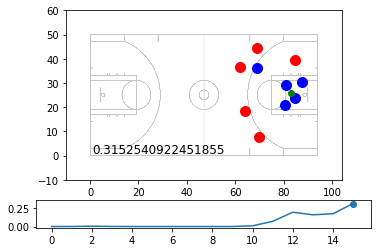

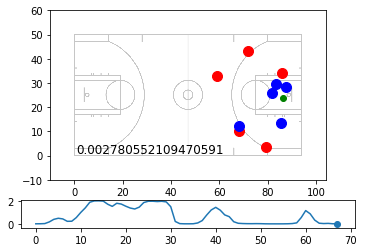

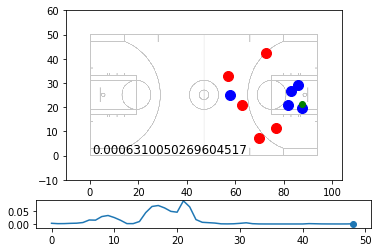

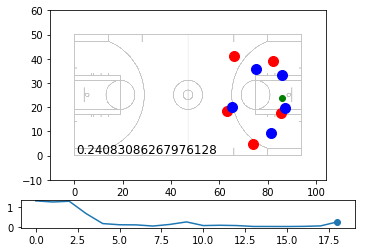

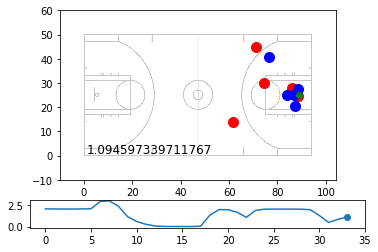

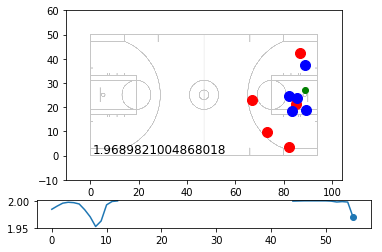

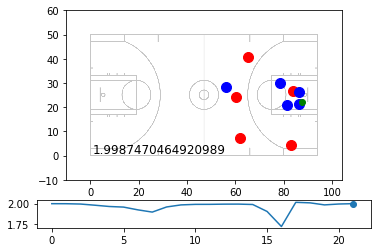

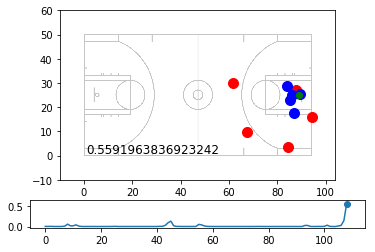

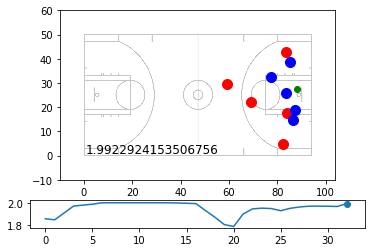

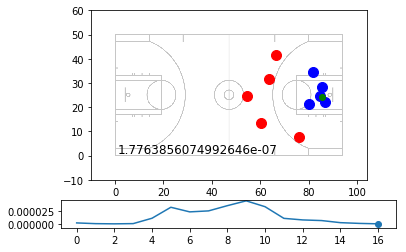

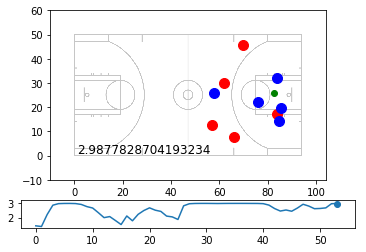

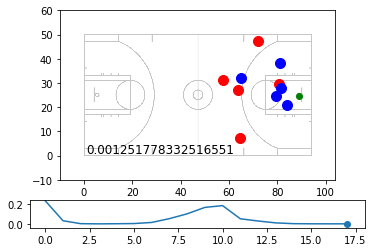

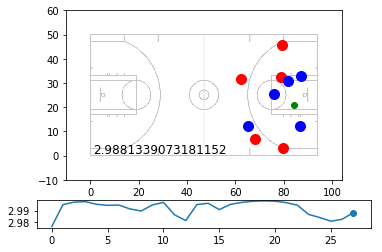

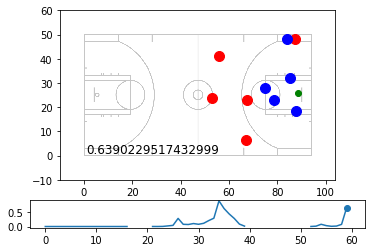

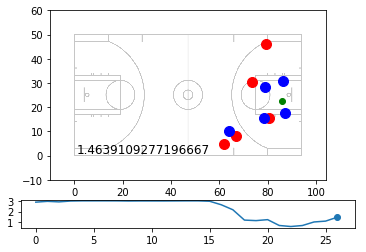

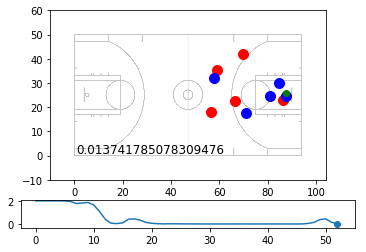

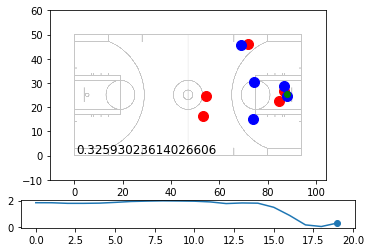

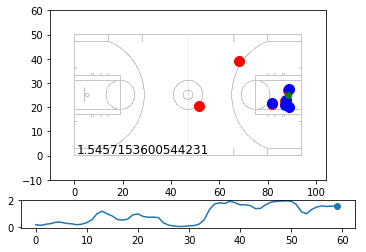

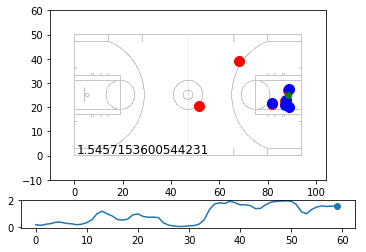

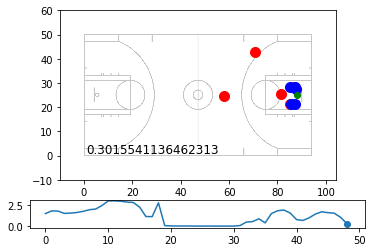

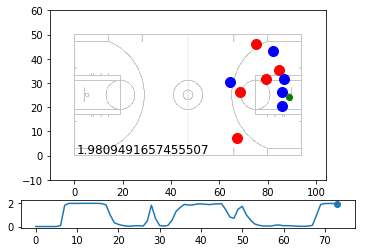

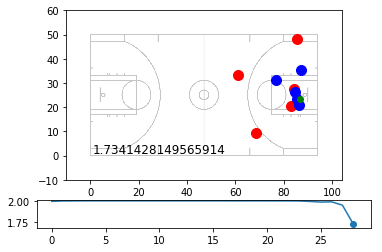

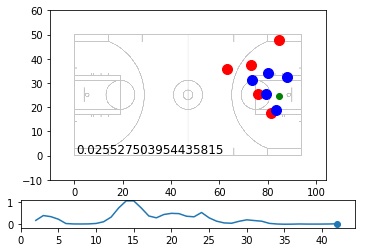

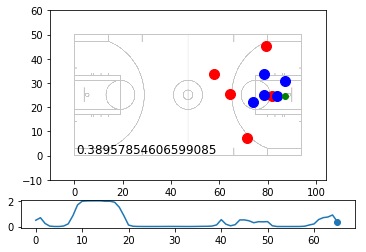

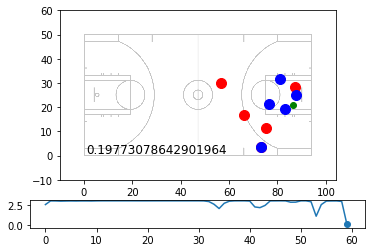

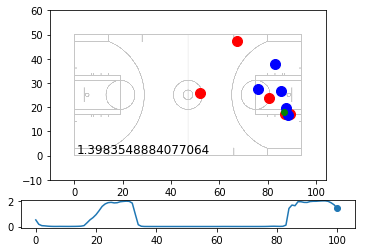

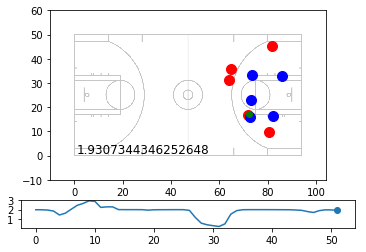

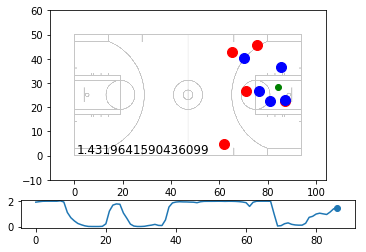

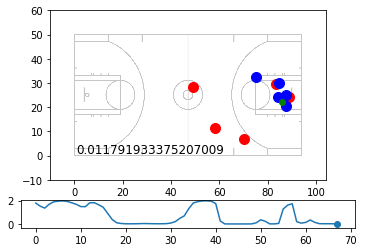

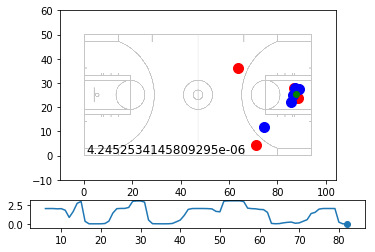

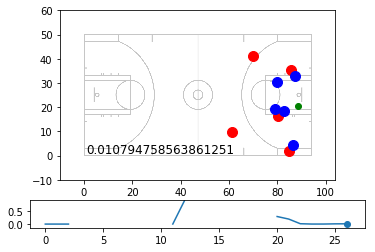

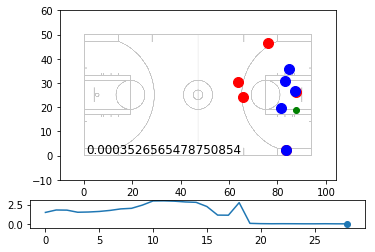

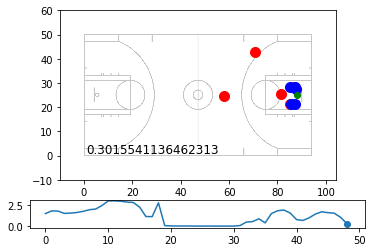

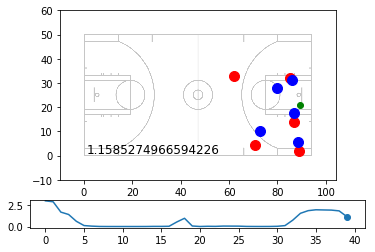

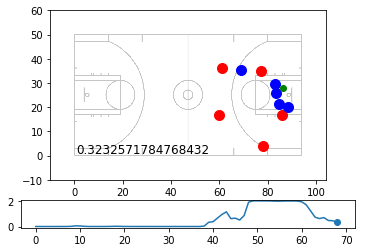

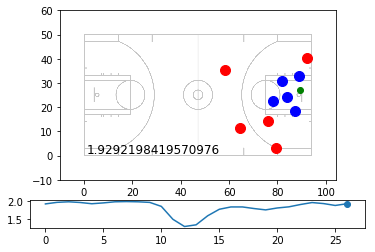

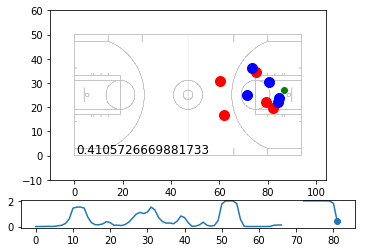

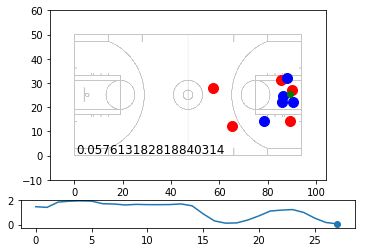

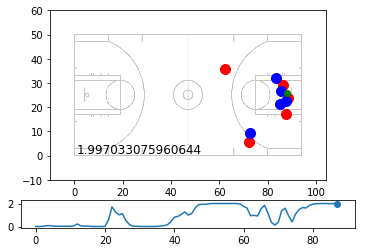

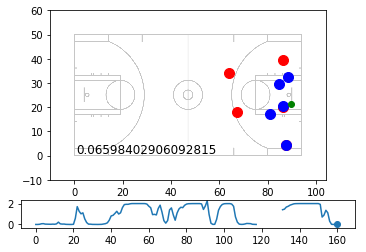

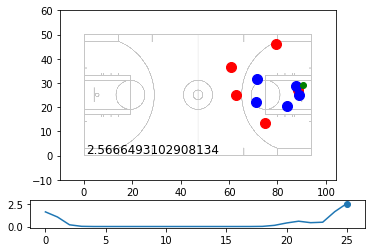

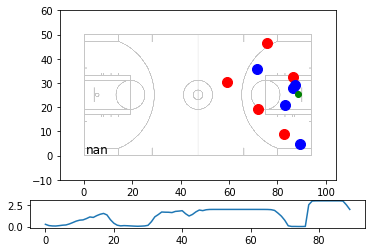

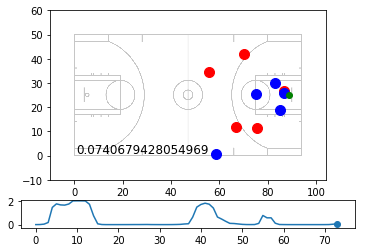

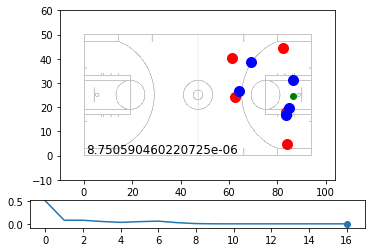

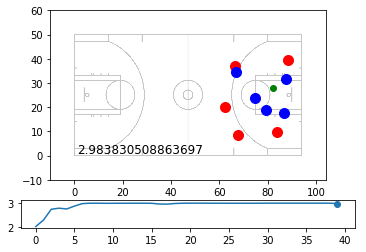

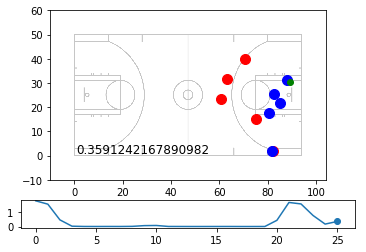

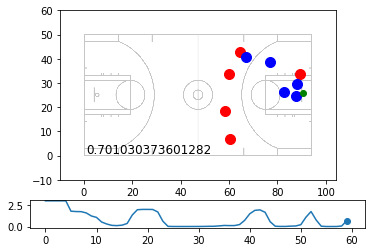

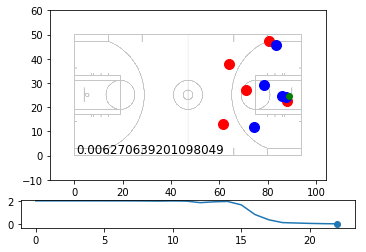

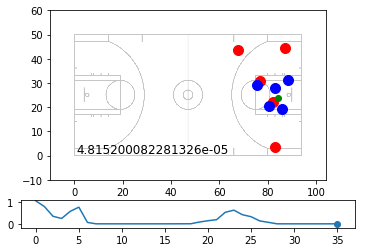

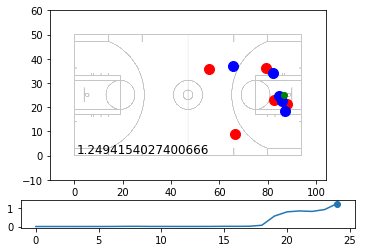

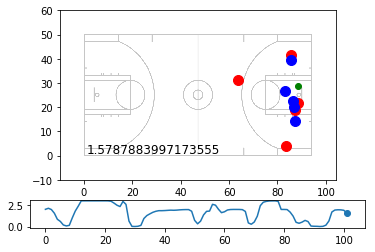

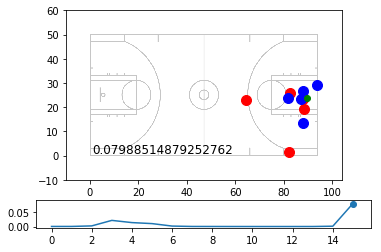

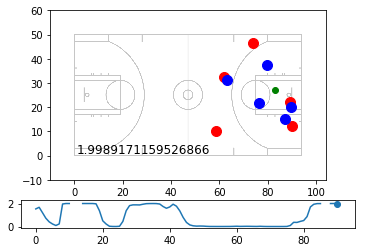

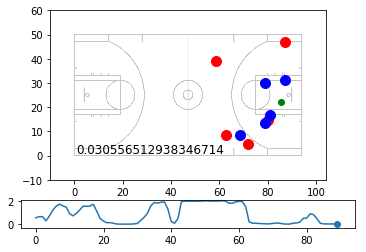

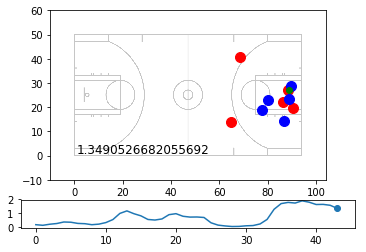

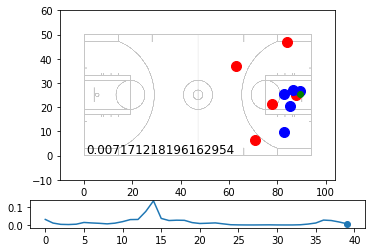

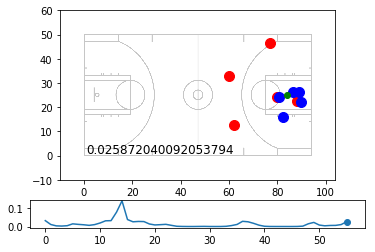

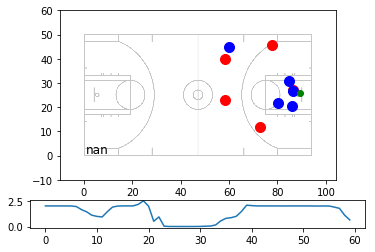

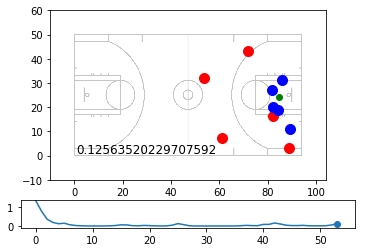

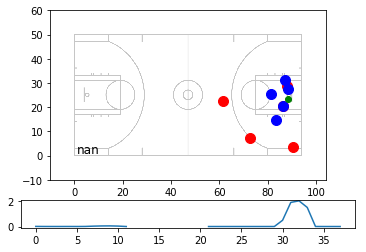

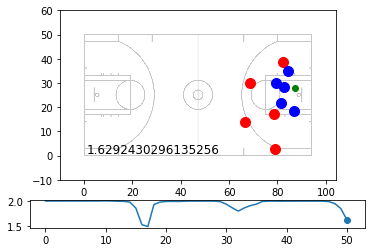

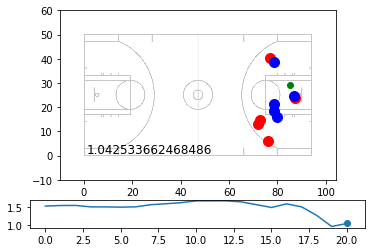

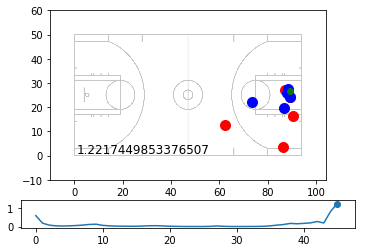

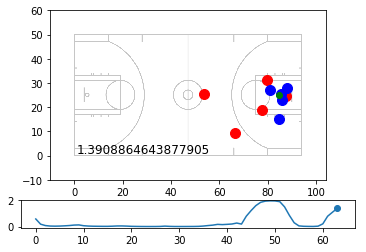

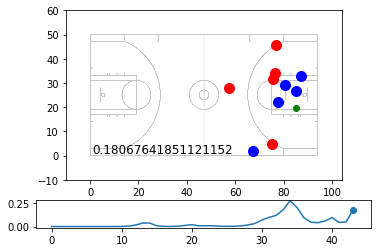

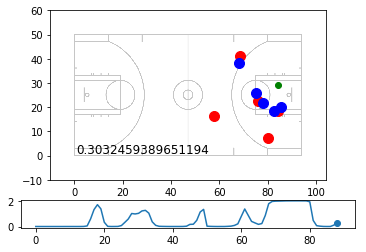

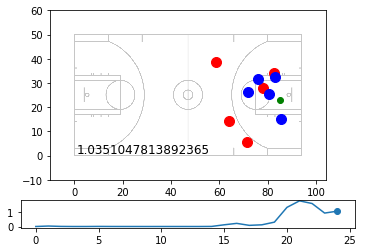

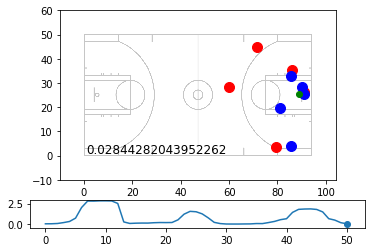

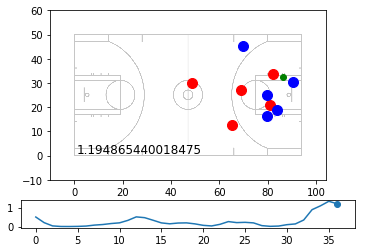

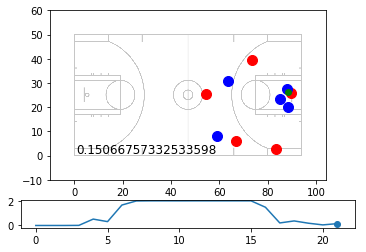

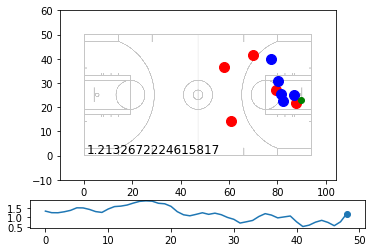

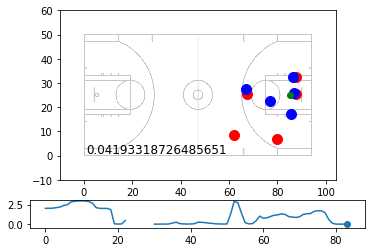

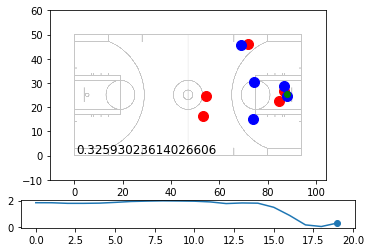

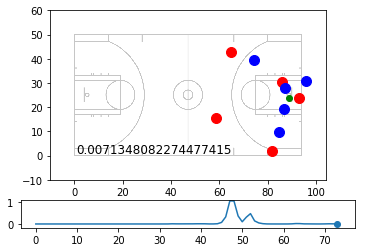

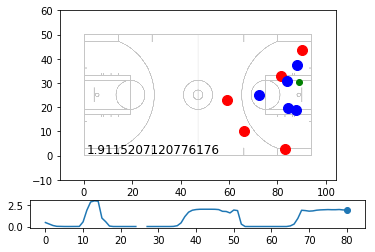

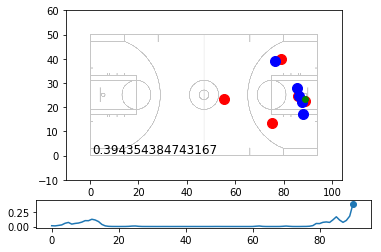

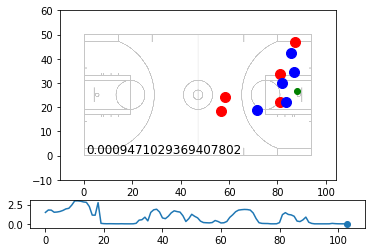

In [21]:
for i in range(pos_.shape[0]):
    e = EpisodeWithEpv(pos_[i], len_[i], info=epv_[i], FPS=5)
    e.output_ani('eval_result_order/{}.mp4'.format(i))